# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Ge the data
The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza and steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

>🔑 **Note:** We start with a smaller datset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-10-03 01:10:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.170.207, 173.194.174.207, 74.125.23.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  26.5MB/s    in 4.7s    

2023-10-03 01:10:34 (22.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data

And for computer vision project... this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list numbe rof files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Oct  3 01:10 .
drwxr-xr-x 1 root root 4096 Oct  3 01:10 ..
drwxr-xr-x 4 root root 4096 Oct  3 01:10 test
drwxr-xr-x 4 root root 4096 Oct  3 01:10 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a lost of class_names from the subdirectories

print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

['2428085.jpg']
Image shape: (384, 512, 3)


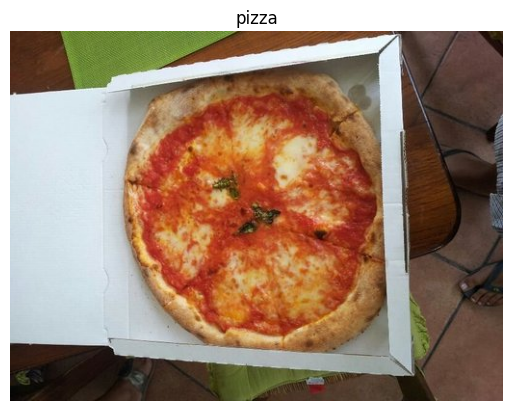

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 80,  45,  23],
        [ 77,  42,  20],
        [ 76,  41,  19],
        ...,
        [ 63,  45,  23],
        [ 69,  48,  31],
        [ 62,  41,  24]],

       [[ 77,  42,  20],
        [ 75,  40,  18],
        [ 74,  39,  17],
        ...,
        [ 58,  40,  18],
        [ 66,  45,  28],
        [ 63,  42,  25]],

       [[ 74,  39,  17],
        [ 73,  38,  16],
        [ 74,  39,  17],
        ...,
        [ 48,  32,   9],
        [ 57,  38,  21],
        [ 58,  39,  22]],

       ...,

       [[ 15,  11,  10],
        [ 14,  10,   9],
        [ 14,  10,   9],
        ...,
        [113,  79,  70],
        [113,  79,  70],
        [114,  80,  71]],

       [[ 13,   9,   8],
        [ 13,   9,   8],
        [ 12,   8,   7],
        ...,
        [112,  78,  69],
        [113,  79,  70],
        [114,  80,  71]],

       [[ 10,   6,   5],
        [ 10,   6,   5],
        [ 10,   6,   5],
        ...,
        [114,  80,  7

In [ ]:
# View the image shape
img.shape  # Returns width, height, colour channels

(384, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. knowing this, one of the most common preprocessing steps for working with images is to scale(also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.31372549, 0.17647059, 0.09019608],
        [0.30196078, 0.16470588, 0.07843137],
        [0.29803922, 0.16078431, 0.0745098 ],
        ...,
        [0.24705882, 0.17647059, 0.09019608],
        [0.27058824, 0.18823529, 0.12156863],
        [0.24313725, 0.16078431, 0.09411765]],

       [[0.30196078, 0.16470588, 0.07843137],
        [0.29411765, 0.15686275, 0.07058824],
        [0.29019608, 0.15294118, 0.06666667],
        ...,
        [0.22745098, 0.15686275, 0.07058824],
        [0.25882353, 0.17647059, 0.10980392],
        [0.24705882, 0.16470588, 0.09803922]],

       [[0.29019608, 0.15294118, 0.06666667],
        [0.28627451, 0.14901961, 0.0627451 ],
        [0.29019608, 0.15294118, 0.06666667],
        ...,
        [0.18823529, 0.1254902 , 0.03529412],
        [0.22352941, 0.14901961, 0.08235294],
        [0.22745098, 0.15294118, 0.08627451]],

       ...,

       [[0.05882353, 0.04313725, 0.03921569],
        [0.05490196, 0.03921569, 0.03529412],
        [0.05490196, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 172ms/step - loss: 0.5588 - accuracy: 0.7087 - val_loss: 0.4445 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4655 - accuracy: 0.7953 - val_loss: 0.4455 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4817 - accuracy: 0.7700 - val_loss: 0.3770 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4054 - accuracy: 0.8300 - val_loss: 0.3589 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.3699 - accuracy: 0.8453 - val_loss: 0.4504 - val_accuracy: 0.8080


🔑 **Note:** If the above cell is taking longer than -10 seconds per epoch, make sure you're using a GPU by going to Runtime ---> Change Runtime Type -> Hardware Accelator -> GPU (you may have to rerun some cells above)

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

**Practice/exercise:** Go through the CNN explainer website for a minimum of 20 minutes and compare our neural network with thiers.

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.67923&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [ ]:
train_data

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 112ms/step - loss: 1.2862 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 149ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly.. let's tryto improve it

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 140ms/step - loss: 3.6051 - accuracy: 0.6167 - val_loss: 0.9318 - val_accuracy: 0.6120
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.7612 - accuracy: 0.7020 - val_loss: 1.7926 - val_accuracy: 0.5440
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.9633 - accuracy: 0.6913 - val_loss: 0.5009 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 13s 283ms/step - loss: 0.6596 - accuracy: 0.7033 - val_loss: 0.4768 - val_accuracy: 0.7620
Epoch 5/5
47/47 [==============================] - 11s 233ms/step - loss: 0.5800 - accuracy: 0.7620 - val_loss: 0.5402 - val_accuracy: 0.7640


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, ** a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['1155665.jpg']
Image shape: (512, 512, 3)
['495892.jpg']
Image shape: (384, 512, 3)


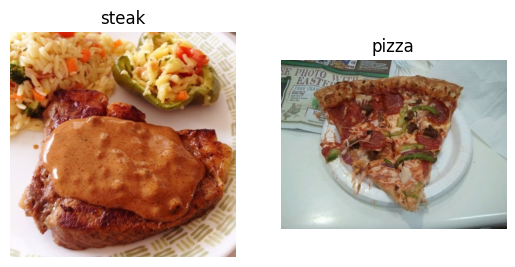

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all -10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn veru well.

why?

Because 32 is good for your health..

In [ ]:
!nvidia-smi

Tue Oct  3 01:13:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    29W /  70W |   2931MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"


In [ ]:
# Load in our image data from directories and tourn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,  #Target directory of images
                                               target_size=(224, 224),  #Target size of images (height, width)
                                               class_mode="binary",     # Type of data you're working with
                                               batch_size=32)           # Size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next()  # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine larning experiment and then as you keep experimenting, you try to beat the baseline.
> 🔑 **Note:** In deep learning, there is almost an an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required. (e.g. look at which current model is performing best in the field for your problem)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,          # Filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=(3, 3),  # the size of the sliding window going across an input
           strides=1,           # the size of step the sliding windows takes across an input
           padding="valid",      # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)),    # Input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")        # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lenghts of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,      # This is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 16s 282ms/step - loss: 0.9318 - accuracy: 0.5793 - val_loss: 0.6554 - val_accuracy: 0.6440
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.5277 - accuracy: 0.7280 - val_loss: 0.4357 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3783 - accuracy: 0.8453 - val_loss: 0.4443 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.2501 - accuracy: 0.9113 - val_loss: 0.4641 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.1299 - accuracy: 0.9620 - val_loss: 0.4442 - val_accuracy: 0.8280


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 4s 263ms/step - loss: 0.4504 - accuracy: 0.8080


[0.450448602437973, 0.8080000281333923]

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it

<Axes: >

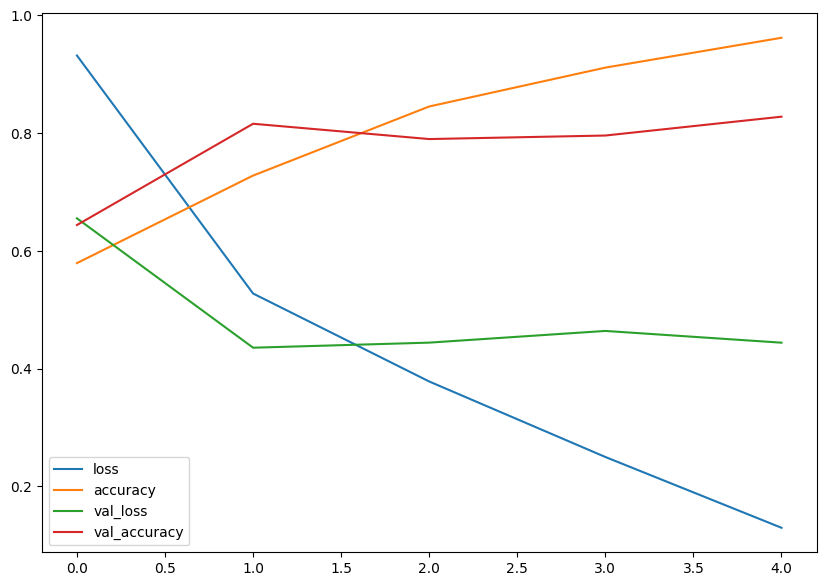

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))    # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

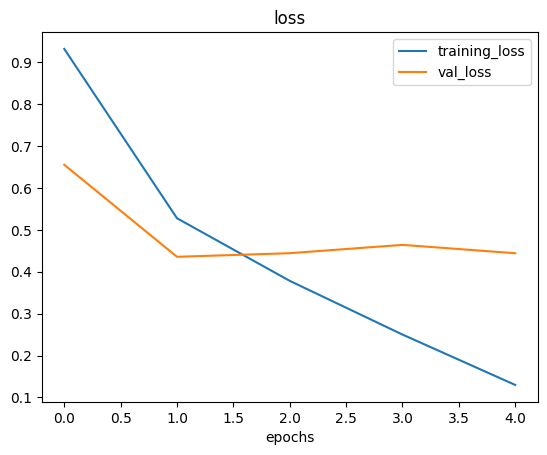

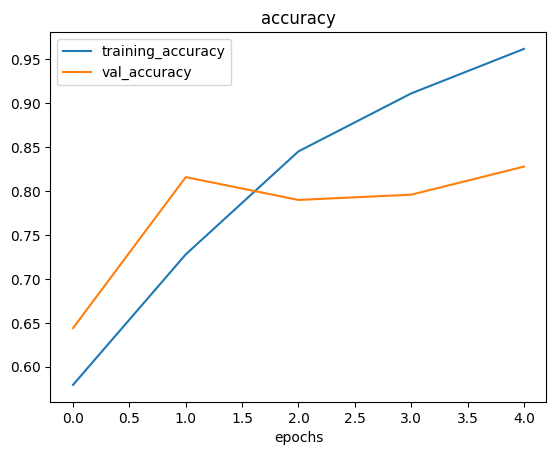

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the modle parameters
Fitting a machine learning model come in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase th number of conv filters
* Add another dense layer to the output of our flattened layer


Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**

In [ ]:
# Create the model (this is going to be out new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 227ms/step - loss: 0.6122 - accuracy: 0.6580 - val_loss: 0.4847 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4541 - accuracy: 0.7933 - val_loss: 0.3538 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 7s 155ms/step - loss: 0.4013 - accuracy: 0.8247 - val_loss: 0.3228 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3721 - accuracy: 0.8387 - val_loss: 0.3009 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 8s 162ms/step - loss: 0.3688 - accuracy: 0.8413 - val_loss: 0.3315 - val_accuracy: 0.8700


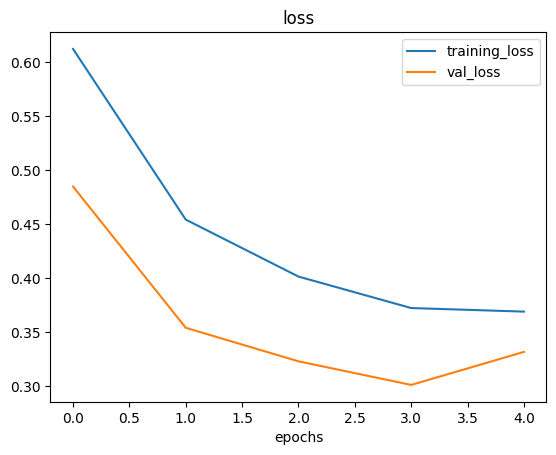

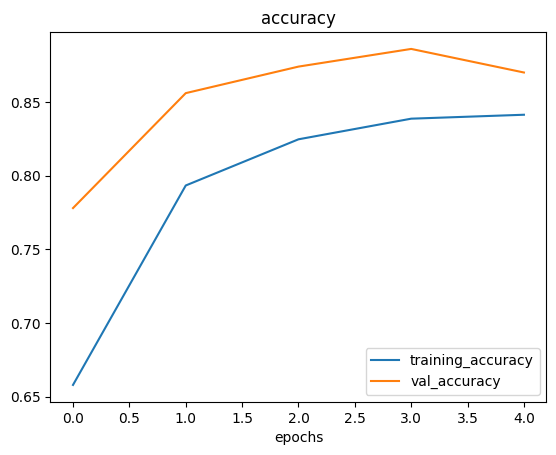

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

In [ ]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 10)       

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,    # how much do you want to rotate an image?
                                             shear_range=0.2,       # how much do you want to shear an image?
                                             zoom_range=0.2,        # zoom in randomly on an image
                                             width_shift_range=0.2,   # move your image around on the x-axis
                                             height_shift_range=0.2,  # move your image around on the y-axis
                                             horizontal_flip=True)    # do you want to flip an image?

# Create ImgeDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [ ]:
# Import dara and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)   # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally ..Let's visualize some augmented data!!

In [ ]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

showing image number: 3


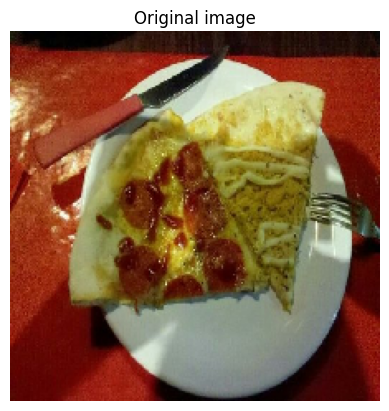

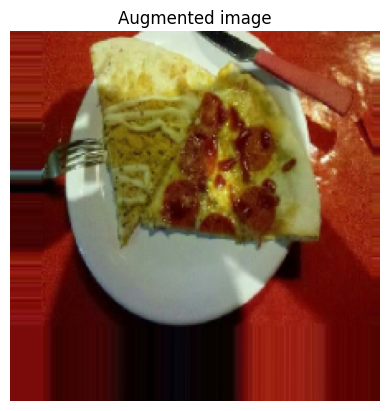

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # Our batch sizes are 32 ...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,     # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 584ms/step - loss: 1.0524 - accuracy: 0.4887 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 23s 500ms/step - loss: 0.6865 - accuracy: 0.5620 - val_loss: 0.6281 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6595 - accuracy: 0.6073 - val_loss: 0.6178 - val_accuracy: 0.6100
Epoch 4/5
47/47 [==============================] - 34s 724ms/step - loss: 0.6414 - accuracy: 0.6687 - val_loss: 0.5940 - val_accuracy: 0.6580
Epoch 5/5
47/47 [==============================] - 33s 698ms/step - loss: 0.5908 - accuracy: 0.7120 - val_loss: 0.5274 - val_accuracy: 0.7120


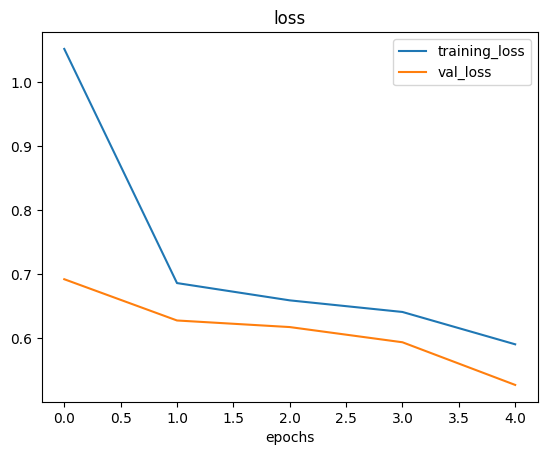

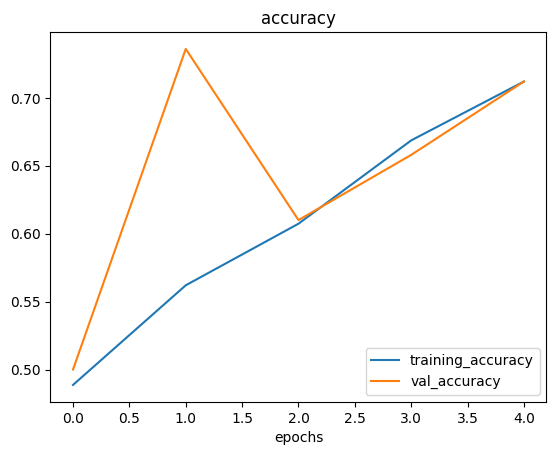

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [ ]:
# Import data and augment it and shuffle fron training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)    #Shuffle this data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # We're fitting on augmented and shuffled data now
                    epochs=5,
                    steps_per_epoch=len(train_data_augmented_shuffled),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 544ms/step - loss: 0.6844 - accuracy: 0.5480 - val_loss: 0.6148 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.5874 - accuracy: 0.6913 - val_loss: 0.4650 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5045 - accuracy: 0.7607 - val_loss: 0.3837 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 20s 423ms/step - loss: 0.4683 - accuracy: 0.7840 - val_loss: 0.3418 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 29s 617ms/step - loss: 0.4523 - accuracy: 0.7967 - val_loss: 0.3354 - val_accuracy: 0.8740


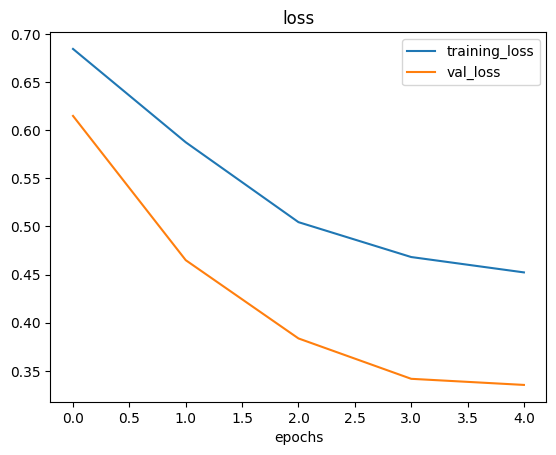

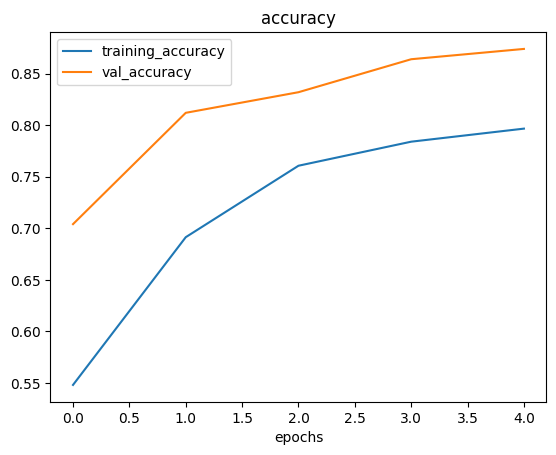

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

🔑**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in oir case, pizza & steak at the same time instead os just pizza then steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more `Conv2D`/ `MaxPool2D` layers)
* Increase the number of filters in each convoluational layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an idela learning rate
* Get more data (give the modle more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction iwth our trained model on our own data.

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-10-03 01:20:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  8.47MB/s    in 0.2s    

2023-10-03 01:20:17 (8.47 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



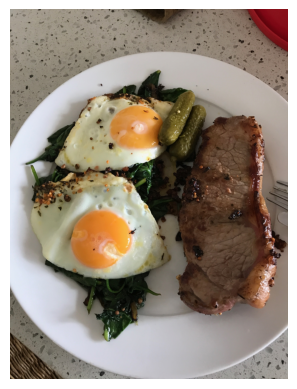

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

🔑**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 223ms/step


array([[0.88800955]], dtype=float32)

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if wecould visualize the image as well as the model's prediction?

In [ ]:
# Reming ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


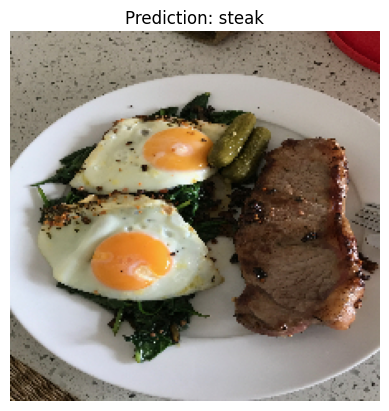

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image.. this time pizza

--2023-10-03 01:20:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  11.0MB/s    in 0.2s    

2023-10-03 01:20:26 (11.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 21ms/step


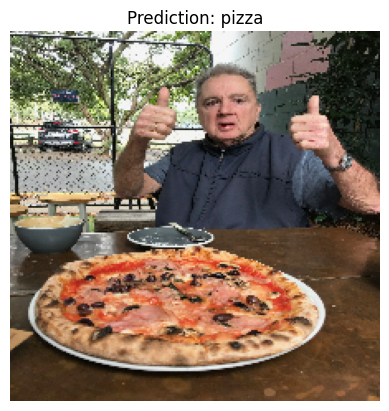

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Milti-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).
1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

# 1. Import and become one with the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-03 02:54:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  20.4MB/s    in 26s     

2023-10-03 02:54:51 (19.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Oct  3 01:20 .
drwxr-xr-x  1 root root 4096 Oct  3 01:20 ..
drwxr-xr-x 12 root root 4096 Oct  3 01:20 test
drwxr-xr-x 12 root root 4096 Oct  3 01:20 train


In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3654669.jpg']
Image shape: (512, 289, 3)


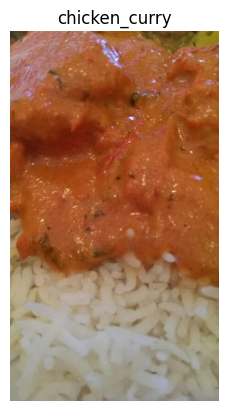

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
random.choice(class_names)

'steak'

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


# Load data un from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website...
how about we just take their model (also on 10 classes) and use it for our problem..?

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous modles but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")  #Changed to have 10 output neurons and use the softmax activationfunction
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit a model

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data,   # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 122ms/step - loss: 2.2195 - accuracy: 0.1796 - val_loss: 2.0606 - val_accuracy: 0.2536
Epoch 2/5
235/235 [==============================] - 29s 124ms/step - loss: 1.9695 - accuracy: 0.3145 - val_loss: 1.9555 - val_accuracy: 0.3060
Epoch 3/5
235/235 [==============================] - 29s 125ms/step - loss: 1.5257 - accuracy: 0.4791 - val_loss: 2.1123 - val_accuracy: 0.2912
Epoch 4/5
235/235 [==============================] - 28s 121ms/step - loss: 0.9043 - accuracy: 0.7044 - val_loss: 2.6810 - val_accuracy: 0.2600
Epoch 5/5
235/235 [==============================] - 38s 162ms/step - loss: 0.3689 - accuracy: 0.8836 - val_loss: 4.0123 - val_accuracy: 0.2392


### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 4.0123 - accuracy: 0.2392


[4.012296199798584, 0.23919999599456787]

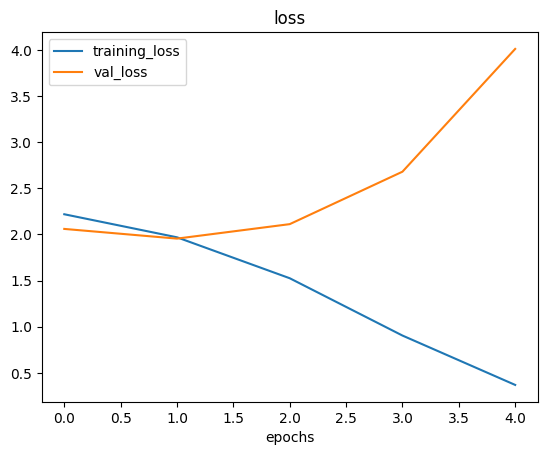

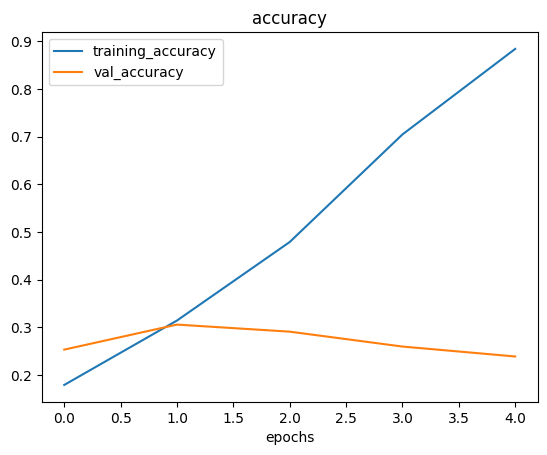

In [ ]:
# Ceck out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great result on the training data but fails to generalize well to unseen data and performs poorly on the dataset

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data.

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simply the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation**- data augmentation manipulates the training data in such a way to add more diversity to it (without altering the originaldata)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [ ]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [ ]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 34s 138ms/step - loss: 2.0921 - accuracy: 0.2471 - val_loss: 1.9262 - val_accuracy: 0.3160
Epoch 2/5
235/235 [==============================] - 32s 138ms/step - loss: 1.7340 - accuracy: 0.4147 - val_loss: 1.8944 - val_accuracy: 0.3352
Epoch 3/5
235/235 [==============================] - 28s 118ms/step - loss: 1.3511 - accuracy: 0.5641 - val_loss: 1.9643 - val_accuracy: 0.3436
Epoch 4/5
235/235 [==============================] - 28s 117ms/step - loss: 0.9114 - accuracy: 0.7217 - val_loss: 2.1404 - val_accuracy: 0.3328
Epoch 5/5
235/235 [==============================] - 37s 157ms/step - loss: 0.5234 - accuracy: 0.8552 - val_loss: 2.4157 - val_accuracy: 0.3204


In [ ]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

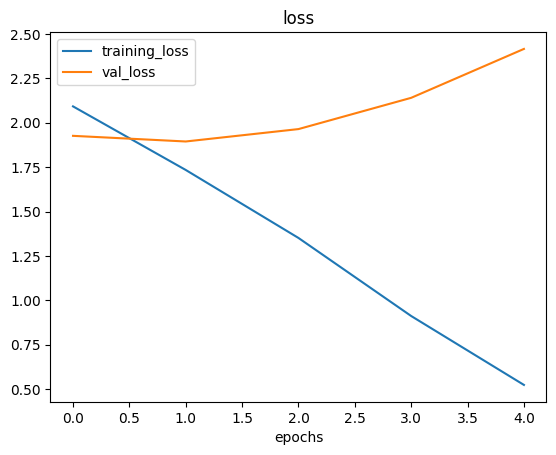

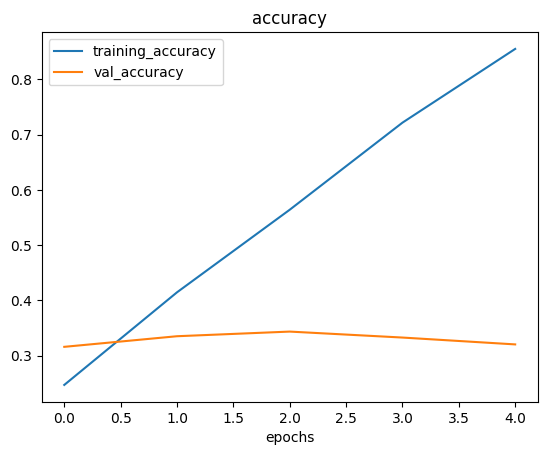

In [ ]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

Looks like our "simplifying the model" experiment didn't work.
the accuracy went down and overfitting cotinued..

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data..
Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224, 224),
                                                                batch_size=32,
                                                                class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 152s 596ms/step - loss: 2.2192 - accuracy: 0.1811 - val_loss: 2.0740 - val_accuracy: 0.2296
Epoch 2/5
235/235 [==============================] - 151s 642ms/step - loss: 2.1153 - accuracy: 0.2303 - val_loss: 2.0157 - val_accuracy: 0.2680
Epoch 3/5
235/235 [==============================] - 117s 497ms/step - loss: 2.0847 - accuracy: 0.2517 - val_loss: 1.9511 - val_accuracy: 0.3020
Epoch 4/5
235/235 [==============================] - 128s 547ms/step - loss: 2.0386 - accuracy: 0.2832 - val_loss: 1.9150 - val_accuracy: 0.3224
Epoch 5/5
235/235 [==============================] - 160s 682ms/step - loss: 1.9998 - accuracy: 0.2961 - val_loss: 1.9349 - val_accuracy: 0.3416


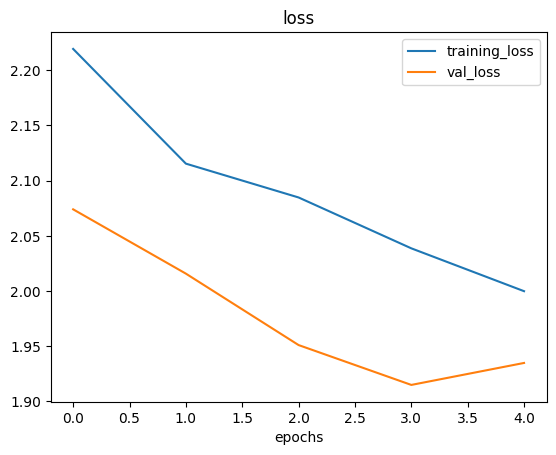

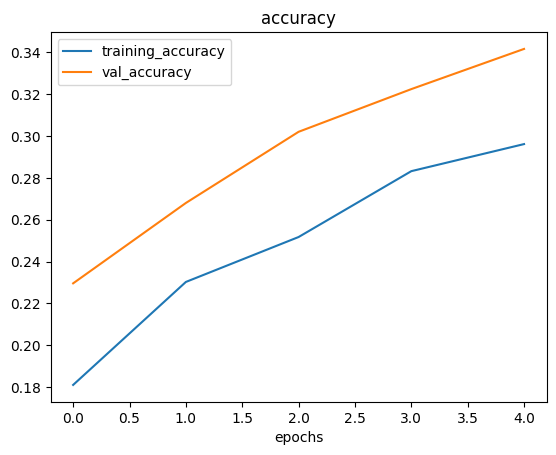

In [ ]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. repeat until satisfied

We could keep going here.. continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [ ]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
3 # Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

--2023-10-03 03:11:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-10-03 03:11:52 (266 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-10-03 03:11:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting resp

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) >1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 32ms/step


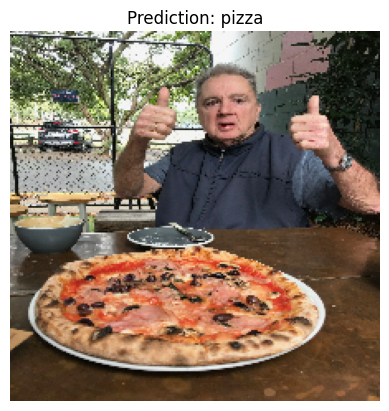

In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_10,   #trained on pizza vs steak
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images, but this is becauseit only achieved -39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 8s 97ms/step - loss: 1.9349 - accuracy: 0.3416


[1.934861660003662, 0.3416000008583069]

In [ ]:
# Compare our loaded modle to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 8s 96ms/step - loss: 1.9349 - accuracy: 0.3416


[1.934861660003662, 0.3416000008583069]